In [8]:
import rnnSMAP
import numpy as np
import pandas as pd
import torch
import argparse

import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

opt = rnnSMAP.classLSTM.optLSTM(
    rootDB=rnnSMAP.kPath['DB_L3_NA'],
    rootOut=rnnSMAP.kPath['Out_L3_NA'],
    syr=2017, eyr=2017,
    var='varLst_Forcing', varC='varConstLst_Noah',
    train='CONUSv16f1', dr=0.5, modelOpt='relu',
    target='SMAP_AM',gpu=0
)

load rnnSMAP


In [ ]:
opt['model'] = 'mc'
opt['out'] = 'mc'
rnnSMAP.funLSTM.trainLSTM(opt)

out = opt['out']
rootOut = rnnSMAP.kPath['Out_L3_NA']
syr = 2015
eyr = 2016

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.025990009307861328
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.017647266387939453
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.017976760864257812
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.015628814697265625
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.016108036041259766
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.015681743621826172
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.01558995246887207
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.016779184341430664
Epoch 1 Loss 0.340 Time 6.94
Epoch 2 Loss 0.165 Time 6.73
Epoch 3 Loss 0.142 Time 6.70
Epoch 4 Loss

Epoch 238 Loss 0.040 Time 8.12
Epoch 239 Loss 0.037 Time 7.12
Epoch 240 Loss 0.038 Time 6.94
Epoch 241 Loss 0.038 Time 6.97
Epoch 242 Loss 0.040 Time 6.94
Epoch 243 Loss 0.039 Time 7.31
Epoch 244 Loss 0.039 Time 7.41
Epoch 245 Loss 0.041 Time 7.24
Epoch 246 Loss 0.039 Time 7.93
Epoch 247 Loss 0.039 Time 7.46
Epoch 248 Loss 0.038 Time 7.87
Epoch 249 Loss 0.040 Time 7.47
Epoch 250 Loss 0.038 Time 7.92
Epoch 251 Loss 0.037 Time 6.98
Epoch 252 Loss 0.036 Time 7.24
Epoch 253 Loss 0.036 Time 7.47
Epoch 254 Loss 0.038 Time 6.83
Epoch 255 Loss 0.037 Time 7.02
Epoch 256 Loss 0.037 Time 8.29
Epoch 257 Loss 0.038 Time 7.68
Epoch 258 Loss 0.039 Time 8.71
Epoch 259 Loss 0.039 Time 8.01
Epoch 260 Loss 0.038 Time 8.11
Epoch 261 Loss 0.038 Time 7.58
Epoch 262 Loss 0.038 Time 6.95
Epoch 263 Loss 0.038 Time 9.29
Epoch 264 Loss 0.039 Time 8.39
Epoch 265 Loss 0.038 Time 8.75
Epoch 266 Loss 0.038 Time 7.33
Epoch 267 Loss 0.039 Time 7.04
Epoch 268 Loss 0.036 Time 8.82
Epoch 269 Loss 0.041 Time 8.28
Epoch 27

Exception in callback BaseAsyncIOLoop._handle_events(14, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(14, 1)>
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lo

In [9]:
out = 'mc'
testName = 'CONUSv16f1'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['Out_L3_NA']

In [10]:
ds1 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2017])# define dataset
ds1.readData(var='SMAP_AM', field='SMAP')# read target
ds1.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')# read prediction
statErr1 = ds1.statCalError(predField='LSTM', targetField='SMAP')# calculate error

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.024343252182006836
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.017850875854492188
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.015573978424072266
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.016811847686767578
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.015455245971679688
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.016010284423828125
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.015752077102661133
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.01788020133972168


/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchLSTM_cell_mc' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/mc/test_CONUSv16f1_2017_2017_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/mc/test_CONUSv16f1_2017_2017_ep500.csv


In [11]:
ds2 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2015, 2016])
ds2.readData(var='SMAP_AM', field='SMAP')
ds2.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')
statErr2 = ds2.statCalError(predField='LSTM', targetField='SMAP')

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/SMAP_AM.csv 0.023749828338623047
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/SMAP_AM.csv 0.020721912384033203
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/APCP_FORA.csv 0.017277956008911133
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/APCP_FORA.csv 0.018038034439086914
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DLWRF_FORA.csv 0.01746201515197754
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DLWRF_FORA.csv 0.016767024993896484
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DSWRF_FORA.csv 0.01590871810913086
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DSWRF_FORA.csv 0.016913175582885742
read /Users/rajdesai/Deskto

/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchLSTM_cell_mc' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/mc/test_CONUSv16f1_2015_2016_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/mc/test_CONUSv16f1_2015_2016_ep500.csv


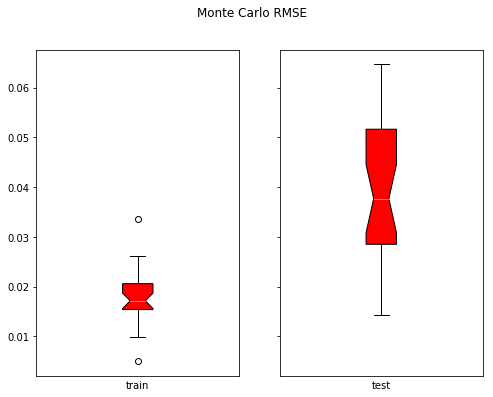

In [13]:
strE = 'RMSE'
dataErr = [getattr(statErr1, strE), getattr(statErr2, strE)]
fig = rnnSMAP.funPost.plotBox(dataErr, labelC=['train', 'test'], title='Monte Carlo ' + strE)